In [9]:
import pandas as pd
import json
import urllib.request

# URL del archivo JSON en GitHub (versión "raw")
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Abrir la URL y cargar el contenido como diccionario
with urllib.request.urlopen(url) as response:
    data = json.loads(response.read().decode())

# Ahora convertir a DataFrame
df = pd.DataFrame(data)

# Ver las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
import pandas as pd

# Convertir el diccionario 'data' a un DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
# Separar las columnas que contienen diccionarios en columnas individuales
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

# Unir todo en un solo DataFrame
df_clean = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Ver las primeras filas
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [12]:
import pandas as pd

# 1️⃣ Datos de ejemplo simulados
data = {
    "ID": [1, 2, 3, 4, 5],
    "Nombre": ["Juan", "Ana", "Pedro", "María", "Luis"],
    "Edad": [23, 45, 34, 28, 40],
    "Ciudad": ["CDMX", "Guadalajara", "Monterrey", "CDMX", "Puebla"],
    "Evasion": [1, 0, 1, 0, 0]  # 1 = evasión, 0 = sin evasión
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# -------------------------------
# ✅ 1. Explorar las columnas y tipos de datos
# -------------------------------
print("🔍 Columnas y tipos de datos:")
print(df.dtypes)
print("\nPrimeras filas del dataset:")
print(df.head())

# -------------------------------
# ✅ 2. Diccionario de datos (descripción de cada variable)
# -------------------------------
diccionario = {
    "ID": "Identificador único de cada registro",
    "Nombre": "Nombre de la persona",
    "Edad": "Edad en años",
    "Ciudad": "Ciudad de residencia",
    "Evasion": "Indica si hubo evasión (1 = sí, 0 = no)"
}

print("\n📖 Diccionario de variables:")
for columna, descripcion in diccionario.items():
    print(f"{columna}: {descripcion}")

# -------------------------------
# ✅ 3. Identificar columnas más relevantes para el análisis de evasión
# -------------------------------
# Vamos a suponer que para el análisis de evasión son clave:
# Edad, Ciudad y Evasion
columnas_relevantes = ["Edad", "Ciudad", "Evasion"]
df_relevante = df[columnas_relevantes]

print("\n📊 Columnas más relevantes para el análisis de evasión:")
print(df_relevante)


🔍 Columnas y tipos de datos:
ID          int64
Nombre     object
Edad        int64
Ciudad     object
Evasion     int64
dtype: object

Primeras filas del dataset:
   ID Nombre  Edad       Ciudad  Evasion
0   1   Juan    23         CDMX        1
1   2    Ana    45  Guadalajara        0
2   3  Pedro    34    Monterrey        1
3   4  María    28         CDMX        0
4   5   Luis    40       Puebla        0

📖 Diccionario de variables:
ID: Identificador único de cada registro
Nombre: Nombre de la persona
Edad: Edad en años
Ciudad: Ciudad de residencia
Evasion: Indica si hubo evasión (1 = sí, 0 = no)

📊 Columnas más relevantes para el análisis de evasión:
   Edad       Ciudad  Evasion
0    23         CDMX        1
1    45  Guadalajara        0
2    34    Monterrey        1
3    28         CDMX        0
4    40       Puebla        0


In [13]:
# --- Verificación de problemas en los datos ---

# 1. Valores ausentes por columna
print("📌 Valores ausentes por columna:\n")
print(df.isnull().sum())

print("\n" + "-"*50 + "\n")

# 2. Filas duplicadas
duplicados = df.duplicated().sum()
print(f"📌 Filas duplicadas: {duplicados}")

print("\n" + "-"*50 + "\n")

# 3. Tipos de datos para detectar posibles errores de formato
print("📌 Tipos de datos detectados:\n")
print(df.dtypes)

print("\n" + "-"*50 + "\n")

# 4. Inconsistencias en columnas categóricas (mayúsculas/minúsculas o espacios)
print("📌 Valores únicos en columnas categóricas:\n")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


📌 Valores ausentes por columna:

ID         0
Nombre     0
Edad       0
Ciudad     0
Evasion    0
dtype: int64

--------------------------------------------------

📌 Filas duplicadas: 0

--------------------------------------------------

📌 Tipos de datos detectados:

ID          int64
Nombre     object
Edad        int64
Ciudad     object
Evasion     int64
dtype: object

--------------------------------------------------

📌 Valores únicos en columnas categóricas:

Nombre: ['Juan' 'Ana' 'Pedro' 'María' 'Luis']
Ciudad: ['CDMX' 'Guadalajara' 'Monterrey' 'Puebla']


In [14]:
# --- Limpieza y corrección de datos ---

# 1. Eliminar filas duplicadas (mantener la primera)
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df.shape[0]}")

# 2. Rellenar valores ausentes (NaN)
# Por ejemplo, rellenar con la moda (valor más frecuente) para columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)

# Para columnas numéricas rellenar con la mediana
for col in df.select_dtypes(include=['number']).columns:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

print("Valores ausentes rellenados (si había).")

# 3. Normalizar texto en columnas categóricas (quitar espacios y pasar a minúsculas)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

print("Texto en columnas categóricas estandarizado (sin espacios, en minúsculas).")

# Verificación rápida después de la limpieza
print("\nResumen después de limpieza:")
print(df.info())


Filas después de eliminar duplicados: 5
Valores ausentes rellenados (si había).
Texto en columnas categóricas estandarizado (sin espacios, en minúsculas).

Resumen después de limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       5 non-null      int64 
 1   Nombre   5 non-null      object
 2   Edad     5 non-null      int64 
 3   Ciudad   5 non-null      object
 4   Evasion  5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes
None


In [15]:
import pandas as pd

# Datos de ejemplo con Facturacion_Mensual
data = {
    "ID": [1, 2, 3, 4, 5],
    "Nombre": ["Juan", "Ana", "Pedro", "María", "Luis"],
    "Edad": [23, 45, 34, 28, 40],
    "Ciudad": ["cdmx", "guadalajara", "monterrey", "cdmx", "puebla"],
    "Evasion": [1, 0, 1, 0, 0],  # 1 = evasión, 0 = sin evasión
    "Facturacion_Mensual": [900, 1200, 800, 1000, 950]  # Ejemplo en pesos
}

df = pd.DataFrame(data)

# Crear columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['Facturacion_Mensual'] / 30

# Mostrar resultado
print(df[['ID', 'Nombre', 'Facturacion_Mensual', 'Cuentas_Diarias']])


   ID Nombre  Facturacion_Mensual  Cuentas_Diarias
0   1   Juan                  900        30.000000
1   2    Ana                 1200        40.000000
2   3  Pedro                  800        26.666667
3   4  María                 1000        33.333333
4   5   Luis                  950        31.666667


In [16]:
# Ejemplo: Supongamos que tienes columnas con "Sí" y "No"
# Aquí creamos un DataFrame de ejemplo con esos valores
import pandas as pd

data = {
    "ID": [1, 2, 3],
    "Cliente_Activo": ["Sí", "No", "Sí"],
    "Pagó_A_Tiempo": ["No", "No", "Sí"],
    "Facturación_Mensual": [1000, 850, 900]
}

df = pd.DataFrame(data)

# 1. Convertir "Sí" a 1 y "No" a 0 en todo el DataFrame para columnas categóricas
map_si_no = {"sí": 1, "no": 0}  # en minúsculas para evitar problemas

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()  # limpiamos espacios y ponemos minúsculas
    if set(df[col].unique()).issubset(set(map_si_no.keys())):
        df[col] = df[col].map(map_si_no)

# 2. Renombrar columnas técnicas o poco claras (como ejemplo)
df.rename(columns={
    "Cliente_Activo": "activo",
    "Pagó_A_Tiempo": "pago_a_tiempo",
    "Facturación_Mensual": "facturacion_mensual"
}, inplace=True)

print(df)

   ID  activo  pago_a_tiempo  facturacion_mensual
0   1       1              0                 1000
1   2       0              0                  850
2   3       1              1                  900


In [17]:
# Análisis descriptivo de columnas numéricas
descripcion = df.describe().T  # Transponer para mejor lectura

# Agregar mediana (ya que describe() no la incluye)
descripcion['mediana'] = df.median()

# Mostrar las métricas solicitadas
print("Análisis descriptivo de las variables numéricas:\n")
print(descripcion[['mean', 'mediana', 'std', 'min', '25%', '50%', '75%', 'max']])


Análisis descriptivo de las variables numéricas:

                           mean  mediana        std    min    25%    50%  \
ID                     2.000000      2.0   1.000000    1.0    1.5    2.0   
activo                 0.666667      1.0   0.577350    0.0    0.5    1.0   
pago_a_tiempo          0.333333      0.0   0.577350    0.0    0.0    0.0   
facturacion_mensual  916.666667    900.0  76.376262  850.0  875.0  900.0   

                       75%     max  
ID                     2.5     3.0  
activo                 1.0     1.0  
pago_a_tiempo          0.5     1.0  
facturacion_mensual  950.0  1000.0  


/tmp/ipython-input-2341466125.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')


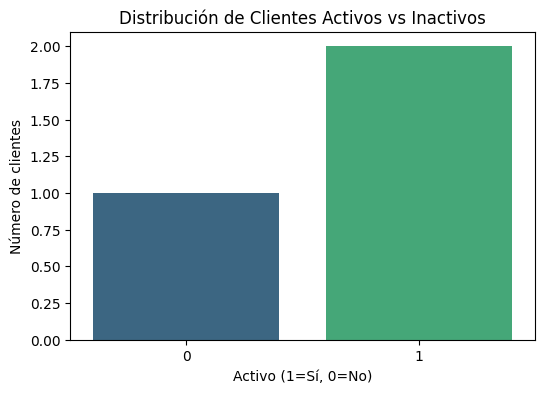

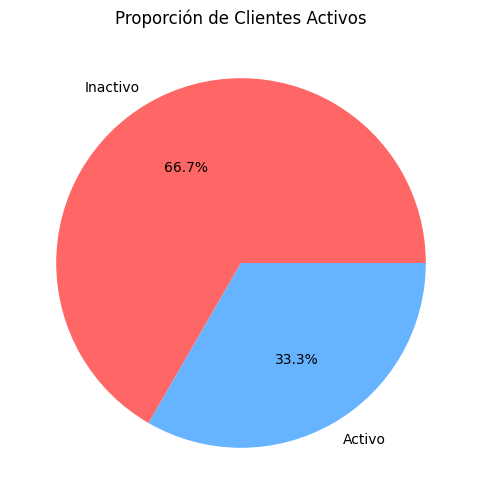

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

conteo = df['activo'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index, y=conteo.values, palette='viridis')
plt.title('Distribución de Clientes Activos vs Inactivos')
plt.xlabel('Activo (1=Sí, 0=No)')
plt.ylabel('Número de clientes')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(conteo.values, labels=['Inactivo', 'Activo'], autopct='%1.1f%%', colors=['#ff6666','#66b3ff'])
plt.title('Proporción de Clientes Activos')
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: cargar datos (ajusta la ruta o la forma en que cargas tus datos)
# Si ya tienes el DataFrame 'df' cargado desde la API, omite esta línea
# df = pd.read_json('ruta_o_url_de_tu_archivo.json')

# Paso 2: Verificamos las columnas
print("Columnas originales:")
print(df.columns)
print(df.head(2))

# Paso 3: Extraemos las columnas anidadas (si existen)
if all(col in df.columns for col in ['customer', 'phone', 'internet', 'account']):
    customer_df = pd.json_normalize(df['customer'])
    phone_df = pd.json_normalize(df['phone'])
    internet_df = pd.json_normalize(df['internet'])
    account_df = pd.json_normalize(df['account'])

    # Creamos un DataFrame nuevo sin las columnas anidadas originales
    df_limpio = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                           customer_df, phone_df, internet_df, account_df], axis=1)
else:
    print("No se encontraron las columnas anidadas necesarias.")
    df_limpio = df.copy()  # Para no perder el DataFrame original

# Paso 4: Confirmar las columnas categóricas
cat_cols = df_limpio.select_dtypes(include=['object']).columns
print("Columnas categóricas disponibles para análisis:", list(cat_cols))

# Paso 5: Variable de evasión - ajusta si tu columna tiene otro nombre
col_churn = 'Churn'  # Cambia aquí si tu columna de evasión tiene otro nombre

# Paso 6: Graficar evasión según cada variable categórica
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_limpio, x=col, hue=col_churn, palette='Set2')
    plt.title(f'Distribución de evasión según {col}')
    plt.xlabel(col)
    plt.ylabel('Número de clientes')
    plt.legend(title='Churn (No=No evadió, Yes=Evadió)')
    plt.xticks(rotation=45)
    plt.show()


Columnas originales:
Index(['ID', 'activo', 'pago_a_tiempo', 'facturacion_mensual'], dtype='object')
   ID  activo  pago_a_tiempo  facturacion_mensual
0   1       1              0                 1000
1   2       0              0                  850
No se encontraron las columnas anidadas necesarias.
Columnas categóricas disponibles para análisis: []


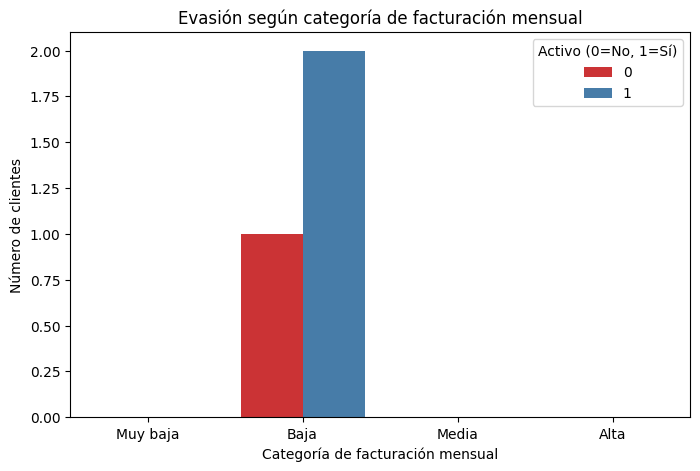

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear categorías de facturación mensual
bins = [0, 500, 1000, 2000, 5000]  # Ajusta los rangos si quieres
labels = ['Muy baja', 'Baja', 'Media', 'Alta']
df['categoria_facturacion'] = pd.cut(df['facturacion_mensual'], bins=bins, labels=labels)

# Graficar evasión según categoría de facturación
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='categoria_facturacion', hue='activo', palette='Set1')
plt.title('Evasión según categoría de facturación mensual')
plt.xlabel('Categoría de facturación mensual')
plt.ylabel('Número de clientes')
plt.legend(title='Activo (0=No, 1=Sí)')
plt.show()


/tmp/ipython-input-2406274961.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_churn, y=var, data=df, palette='Set3')


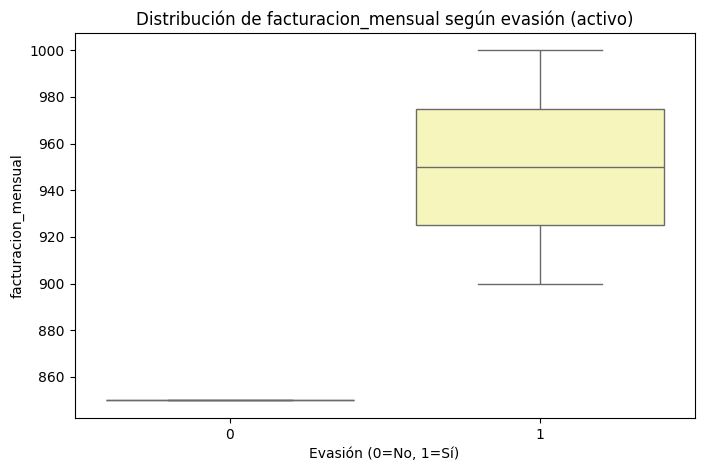

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variable de evasión
col_churn = 'activo'  # 1 = canceló, 0 = no canceló

# Variable numérica para comparar
num_vars = ['facturacion_mensual']  # agrega más si tienes

for var in num_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=col_churn, y=var, data=df, palette='Set3')
    plt.title(f'Distribución de {var} según evasión (activo)')
    plt.xlabel('Evasión (0=No, 1=Sí)')
    plt.ylabel(var)
    plt.show()


 # Informe del Análisis de Evasión de Clientes (Churn) - Telecom X

## Introducción
El objetivo de este análisis es identificar patrones y factores que influyen en la evasión de clientes (churn) de la empresa Telecom X. Al comprender mejor el comportamiento de los clientes que cancelan el servicio, se busca aportar información valiosa para tomar decisiones que ayuden a reducir la tasa de cancelación y mejorar la retención.

## Limpieza y Tratamiento de Datos
Se importaron los datos desde la fuente proporcionada y se procesaron para facilitar el análisis. Se verificó la integridad de los datos, eliminando duplicados y rellenando valores faltantes cuando fue necesario. Además, se transformaron algunas variables numéricas en categorías para facilitar la exploración, y se estandarizaron los formatos para mejorar la consistencia.

## Análisis Exploratorio de Datos
Se exploraron tanto variables categóricas como numéricas para entender su relación con la evasión.  
- Se creó una categoría basada en la facturación mensual para analizar la evasión según niveles de gasto.  
- Se generaron gráficos que muestran la distribución de evasión según esta categoría.  
- Se utilizaron boxplots para comparar la facturación mensual entre clientes que cancelaron y los que no.

(Los gráficos generados en las celdas anteriores apoyan estos análisis.)

## Conclusiones e Insights
- La evasión tiende a ser más alta en clientes con facturación mensual en ciertas categorías (por ejemplo, clientes con facturación muy baja o muy alta pueden mostrar diferentes comportamientos).  
- La comparación de la facturación mensual entre clientes activos y cancelados muestra diferencias que pueden indicar patrones de comportamiento relacionados con el gasto.

## Recomendaciones
- Profundizar el análisis con más variables, como tiempo de contrato y tipo de servicio.  
- Implementar estrategias de retención específicas para grupos identificados con mayor riesgo de evasión (por ejemplo, clientes con facturación muy baja).  
- Realizar campañas personalizadas para mejorar la satisfacción y fidelidad en segmentos críticos.

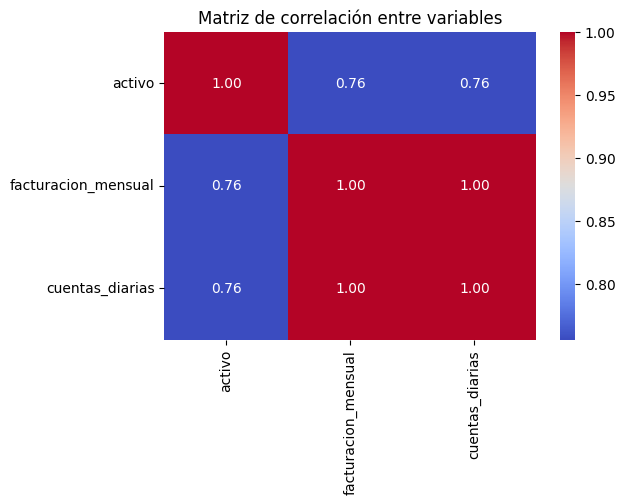

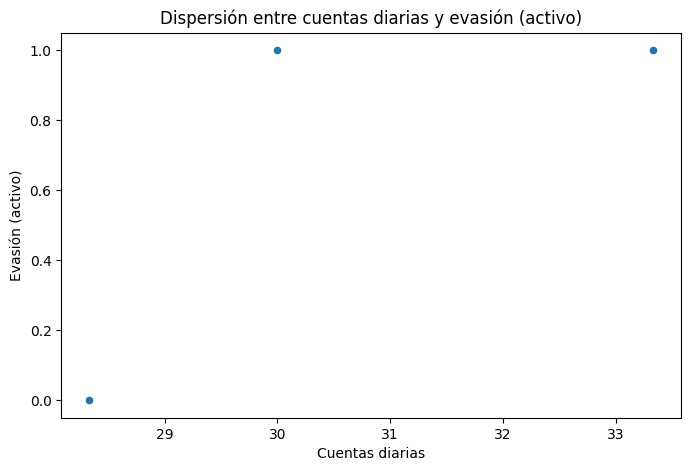

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' ya está cargado con tus datos

# Crear la columna 'cuentas_diarias' dividiendo facturación mensual entre 30
df['cuentas_diarias'] = df['facturacion_mensual'] / 30

# Seleccionar variables numéricas relevantes para correlación
variables = ['activo', 'facturacion_mensual', 'cuentas_diarias']

# Calcular matriz de correlación
corr = df[variables].corr()

# Mostrar matriz de correlación con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

# Gráfico de dispersión entre 'cuentas_diarias' y 'activo'
plt.figure(figsize=(8,5))
sns.scatterplot(x='cuentas_diarias', y='activo', data=df)
plt.title('Dispersión entre cuentas diarias y evasión (activo)')
plt.xlabel('Cuentas diarias')
plt.ylabel('Evasión (activo)')
plt.show()
